In [2]:
#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
from sklearn import metrics
%matplotlib inline

In [3]:
#reading CSV file into Data variable
data = pd.read_csv(r"C:\Users\puleo\Desktop\SeckiN\netflow_day-02.csv",sep=",",index_col=False, nrows=100000)

In [4]:
print(data)

         time  duration   srcDevice   dstDevice  protocol    srcPort  \
0      118781      5580  Comp364445  Comp547245        17  Port05507   
1      118783      6976  Comp450942  Comp829338         6  Port03137   
2      118785     14178    IP564116  Comp141988        17       5060   
3      118785     28147    IP564116  Comp141988        17       5060   
4      118785     48507    IP564116  Comp141988        17       5060   
5      118785     63173    IP564116  Comp141988        17       5060   
6      118785     78594    IP564116  Comp141988        17       5060   
7      118785     90763    IP564116  Comp141988        17       5060   
8      118785    104427    IP564116  Comp141988        17       5060   
9      118785    115677    IP564116  Comp141988        17       5060   
10     118785    135078    IP564116  Comp141988        17       5060   
11     118785    148289    IP564116  Comp141988        17       5060   
12     118785    167723    IP564116  Comp141988        17       

In [5]:
#Storing these 4 columns into variable X
X = data[['srcPackets','dstPackets','srcBytes','dstBytes']]

In [6]:
#Transform X into a normalized data set
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X))

In [7]:
#we assign column names to X_normalized
X_normalized.columns = ['srcPackets','dstPackets','srcBytes','dstBytes']

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_normalized)
y_kmeans = kmeans.predict(X_normalized)

In [9]:
#Assigning cluster centers
centers = kmeans.cluster_centers_
print('Cluster centers of columns:\n')
print(pd.DataFrame(centers,columns= ['srcPackets','dstPackets','srcBytes','dstBytes']))

Cluster centers of columns:

   srcPackets  dstPackets  srcBytes  dstBytes
0    0.000186    0.000117  0.000370  0.000314
1    0.588978    0.475977  0.620936  0.465306


In [10]:
from sklearn import metrics
from scipy.spatial.distance import cdist

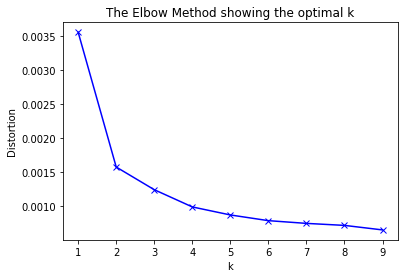

In [11]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_normalized)
    kmeanModel.fit(X_normalized)
    distortions.append(sum(np.min(cdist(X_normalized, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_normalized.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [12]:
variables = pd.read_csv(r"C:\Users\puleo\Desktop\SeckiN\netflow_day-02.csv",sep=",",index_col=False, nrows=100000)

Y = variables[['srcPackets']]

X = variables[['srcBytes']]

In [13]:
import pylab as pl

In [14]:
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [15]:

pca = PCA(n_components=1).fit(Y)

pca_d = pca.transform(Y)

pca_c = pca.transform(X)

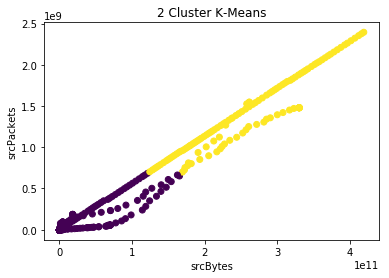

In [16]:
kmeans=KMeans(n_clusters=2)

kmeansoutput=kmeans.fit(Y)

kmeansoutput

pl.figure('2 Cluster K-Means')

pl.scatter(pca_c[:, 0], pca_d[:, 0], c=kmeansoutput.labels_)

pl.xlabel('srcBytes')

pl.ylabel('srcPackets')

pl.title('2 Cluster K-Means')

pl.show()

In [17]:
variables = pd.read_csv(r"C:\Users\puleo\Desktop\SeckiN\netflow_day-02.csv",sep=",",index_col=False, nrows=100000)

Y = variables[['dstPackets']]

X = variables[['dstBytes']]

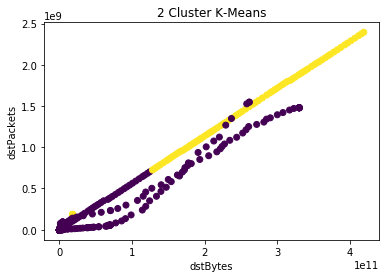

In [18]:
kmeans=KMeans(n_clusters=2)

kmeansoutput=kmeans.fit(Y)

kmeansoutput

pl.figure('2 Cluster K-Means')

pl.scatter(pca_c[:, 0], pca_d[:, 0], c=kmeansoutput.labels_)

pl.xlabel('dstBytes')

pl.ylabel('dstPackets')

pl.title('2 Cluster K-Means')

pl.show()

In [21]:
#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [23]:
#Gathering Data
credit = pd.read_csv(r"C:\Users\puleo\Desktop\SeckiN\netflow_day-02.csv",sep=",",index_col=False, nrows=100000)

In [24]:
#First 5 Rows of Data#First 5 
credit.head()

,time,duration,srcDevice,dstDevice,protocol,srcPort,dstPort,srcPackets,dstPackets,srcBytes,dstBytes
0,118781,5580,Comp364445,Comp547245,17,Port05507,Port46272,0,755065,0,1042329018
1,118783,6976,Comp450942,Comp829338,6,Port03137,445,1665,1108,300810,250408
2,118785,14178,IP564116,Comp141988,17,5060,5060,1866,0,1477041,0
3,118785,28147,IP564116,Comp141988,17,5060,5060,3326,0,2656305,0
4,118785,48507,IP564116,Comp141988,17,5060,5060,5423,0,4388449,0


In [25]:
#Selecting Numeric Fields To Be Used In Modelling
X = credit[['srcPackets','dstPackets','srcBytes','dstBytes']]

In [26]:
#Loading Min Max Scaling and Creating New Data Frame
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X))

In [27]:
#Assining Column Names
X_normalized.columns = ['srcPackets','dstPackets','srcBytes','dstBytes']

In [28]:
#Implementing Algorithm
from sklearn.ensemble import IsolationForest
iforest = IsolationForest()
iforest.fit(X_normalized)

IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [29]:
#Predicting Anomaly Class and Anomaly Score
Anomaly_Class = iforest.predict(X_normalized)
Anomaly_Score = iforest.decision_function(X_normalized)

In [30]:
#Creating New Columns Based on Anomaly Detection
X['Anomaly_Class'] = Anomaly_Class
X['Anomaly_Score'] = Anomaly_Score

In [31]:
#Viewing Class Counts#Viewing 
#-1 is anomaly, 1 is normal
X.groupby('Anomaly_Class')[['Anomaly_Score']].count()

,Anomaly_Score
Anomaly_Class,
-1,10005
1,89995


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C86A53FE80>,
      dtype=object)

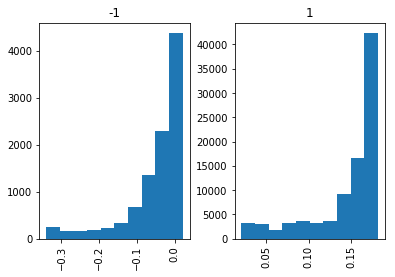

In [32]:
#Histogram of Anomaly Scores By Anomaly Class
X['Anomaly_Score'].hist(by=X['Anomaly_Class'])

In [33]:
#Descriptive Statistics#Descrip 
X['Anomaly_Score'].describe()

count    100000.000000
mean          0.126158
std           0.075239
min          -0.340395
25%           0.101526
50%           0.161206
75%           0.173984
max           0.181994
Name: Anomaly_Score, dtype: float64

In [34]:
#Implementing Algorithm With Different Parameters
#contamination: Proportion of outliers in the data set
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(contamination=0.2)
iforest.fit(X_normalized)

IsolationForest(bootstrap=False, contamination=0.2, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [35]:
#Predicting Anomaly Class and Anomaly Score#Predict 
Anomaly_Class = iforest.predict(X_normalized)
Anomaly_Score = iforest.decision_function(X_normalized)

In [36]:
#Creating New Columns Based on Anomaly Detection
X['Anomaly_Class_Contamination'] = Anomaly_Class
X['Anomaly_Score_Contamination'] = Anomaly_Score

In [37]:
#Viewing Class Counts
#-1 is anomaly, 1 is normal
X.groupby('Anomaly_Class_Contamination')[['Anomaly_Score_Contamination']].count()

,Anomaly_Score_Contamination
Anomaly_Class_Contamination,
-1,20002
1,79998


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C86D0703C8>,
      dtype=object)

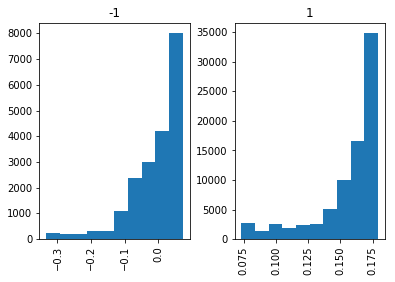

In [38]:
#Histogram of Anomaly Scores By Anomaly Class#Histogr 
X['Anomaly_Score_Contamination'].hist(by=X['Anomaly_Class_Contamination'])

In [39]:
#Descriptive Statistics#Descrip 
X['Anomaly_Score_Contamination'].describe()

count    100000.000000
mean          0.122956
std           0.077462
min          -0.333600
25%           0.096794
50%           0.159191
75%           0.172420
max           0.179224
Name: Anomaly_Score_Contamination, dtype: float64

In [40]:
#Implementing Algorithm With Different Parameters
#bootstrap: If True, individual trees are fit on random subsets of the training data sampled with replacement.
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(bootstrap=True)
iforest.fit(X_normalized)

IsolationForest(bootstrap=True, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [41]:
#Predicting Anomaly Class and Anomaly Score
Anomaly_Class = iforest.predict(X_normalized)
Anomaly_Score = iforest.decision_function(X_normalized)

In [42]:
#Creating New Columns Based on Anomaly Detection
X['Anomaly_Class_Bootstrap'] = Anomaly_Class
X['Anomaly_Score_Bootstrap'] = Anomaly_Score

In [43]:
#Viewing Class Counts
#-1 is anomaly, 1 is normal
X.groupby('Anomaly_Class_Bootstrap')[['Anomaly_Score_Bootstrap']].count()

,Anomaly_Score_Bootstrap
Anomaly_Class_Bootstrap,
-1,10000
1,90000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C8002B6C88>,
      dtype=object)

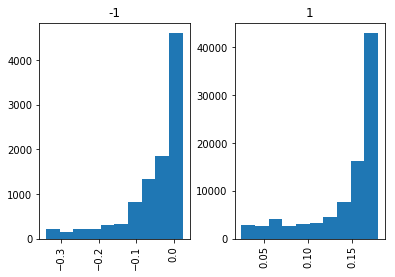

In [44]:
#Histogram of Anomaly Scores By Anomaly Class#Histogr 
X['Anomaly_Score_Bootstrap'].hist(by=X['Anomaly_Class_Bootstrap'])

In [45]:
#Original Data Set With New Variables#Origina 
X.head()

,srcPackets,dstPackets,srcBytes,dstBytes,Anomaly_Class,Anomaly_Score,Anomaly_Class_Contamination,Anomaly_Score_Contamination,Anomaly_Class_Bootstrap,Anomaly_Score_Bootstrap
0,0,755065,0,1042329018,-1,-0.175456,-1,-0.185964,-1,-0.183142
1,1665,1108,300810,250408,1,0.177771,1,0.169069,1,0.173849
2,1866,0,1477041,0,1,0.176864,1,0.172975,1,0.173596
3,3326,0,2656305,0,1,0.178125,1,0.169562,1,0.173107
4,5423,0,4388449,0,1,0.175358,1,0.171592,1,0.170879


In [46]:
#Top 5 Anomaly Records
X[['Anomaly_Score_Contamination','Anomaly_Score_Bootstrap','Anomaly_Score']].head().sort_values(['Anomaly_Score_Contamination'], ascending=[1])

,Anomaly_Score_Contamination,Anomaly_Score_Bootstrap,Anomaly_Score
0,-0.185964,-0.183142,-0.175456
1,0.169069,0.173849,0.177771
3,0.169562,0.173107,0.178125
4,0.171592,0.170879,0.175358
2,0.172975,0.173596,0.176864
